# Principal Component Analysis

PCA is a dimensionality reduction technique that reduces the number of dimensions in a dataset without sacrificing a commensurate amount of information. It has many practical uses:

1. Reducing high-dimensional data to two or three dimensions so that it can be plotted
2. Reducing the number of dimensions and then restoring the original for annomaly detection and noise filtering
3. Anonymizing a dataset so that it can be shared with others without revealing the nature or meaning of the data

## Understanding Principal Component Analysis

If we take a two dimensionsl dataset as an example, the coordinate system is transformed so that one axis captures most of the variance in the dataset. This is the dataset's primary principal component. The other axis contains a narrower range of values and represents the secondary principal component. The number of principal components equals the number of dimensions in a dataset. PCA finds the two principal componets and eliminates the one with less variance. PCA works by building a covariance matrix that quantifies the variance of each dimension with respect to the others, and from the matrix computing eigenvectors and eigenvalues.

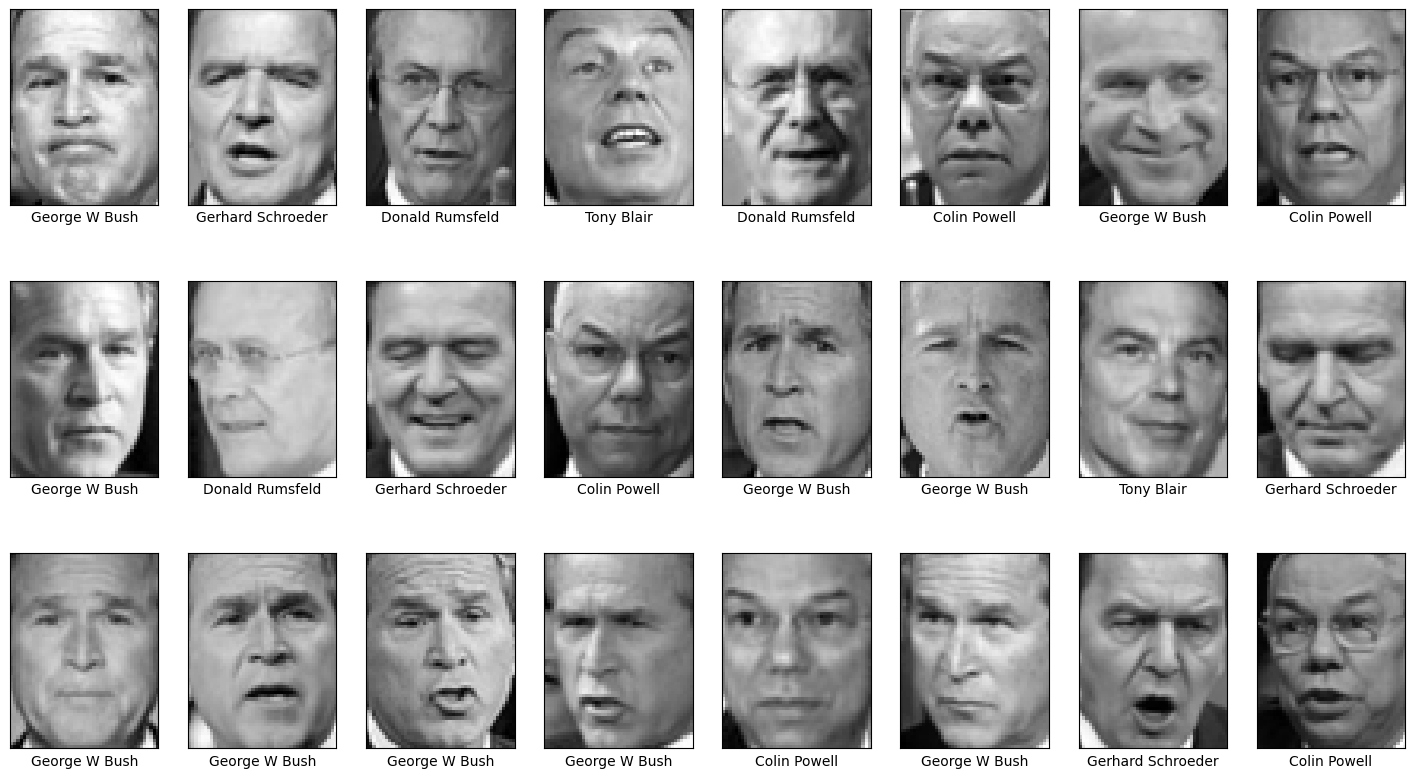

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=100, slice_=None)
faces.images = faces.images[:, 35:97, 39:86]
faces.data = faces.images.reshape(faces.images.shape[0], faces.images.shape[1] * faces.images.shape[2])

fig, ax = plt.subplots(3, 8, figsize=(18, 10))

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

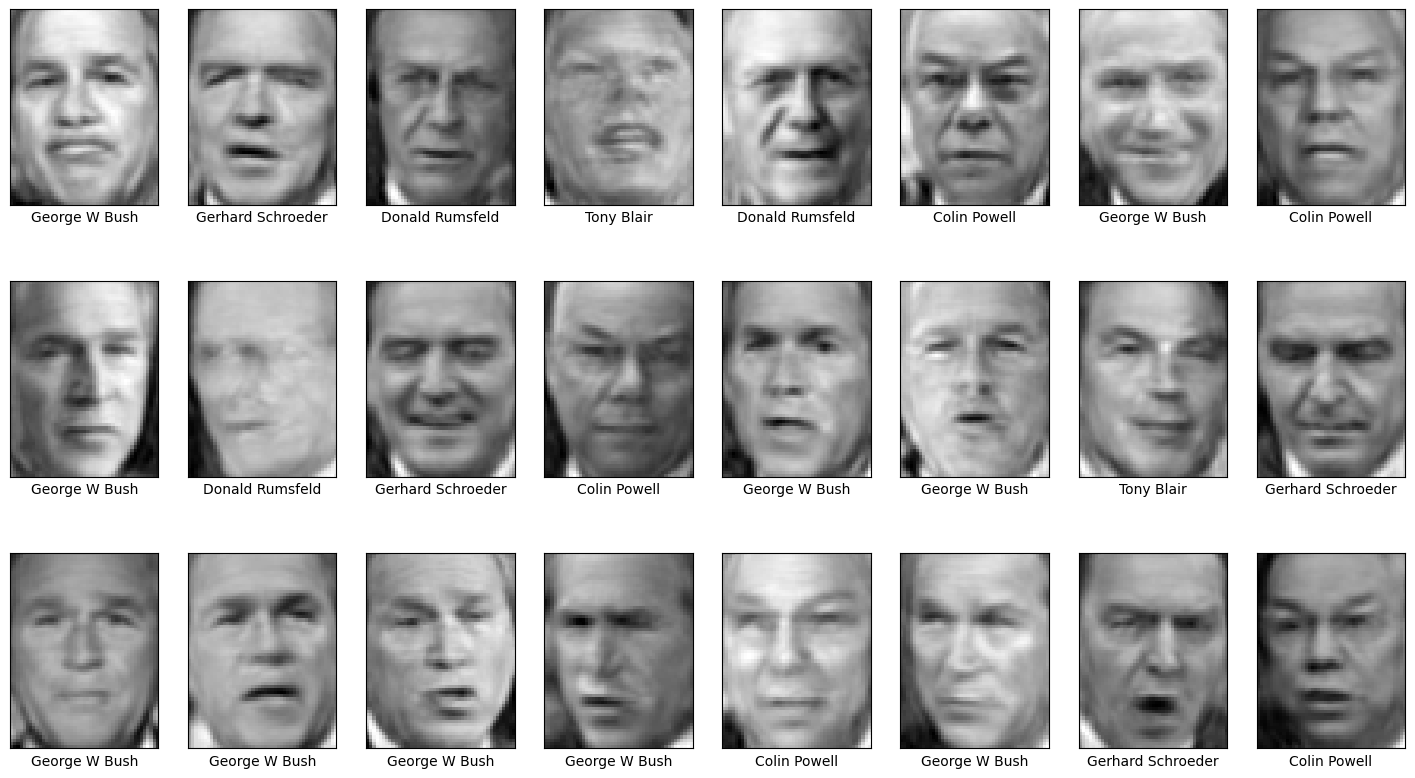

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=150, random_state=0)
pca_faces = pca.fit_transform(faces.data)
unpca_faces = pca.inverse_transform(pca_faces).reshape(1140, 62, 47)

fig, ax = plt.subplots(3, 8, figsize=(18,10))

for i, axi in enumerate(ax.flat):
    axi.imshow(unpca_faces[i], cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

One way to find the optimal number of components is with scree plot, which charts the proportion of explained variance for each dimension.

Text(0, 0.5, 'Explained Variance')

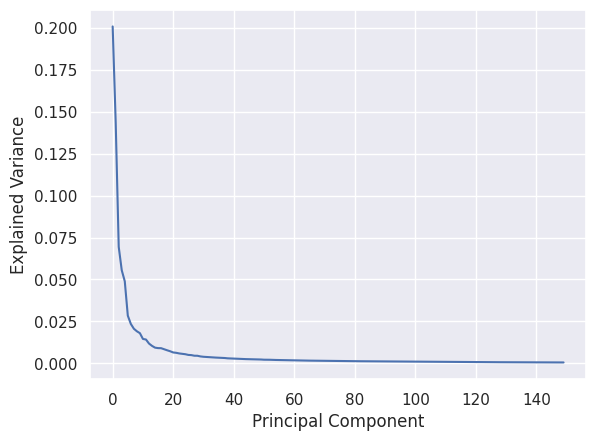

In [3]:
import seaborn as sns
sns.set()

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

Text(0, 0.5, 'Cumulative Explained Variance')

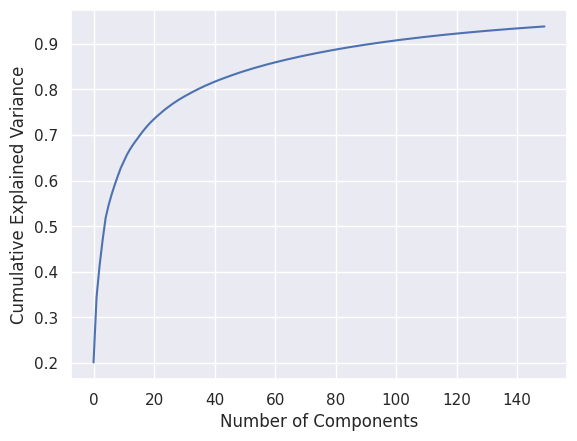

In [4]:
import numpy as np

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

## Filtering Noise

One use of PCA is to filter noise from data. Noise is data which is random, corrupt or meaningless. The basic approach is to PCA-transform the data and invert the transform, reducing the dataset from m dimensions to n and then restoring it to m.

Adding random noise to the LFW dataset to test the supposition above

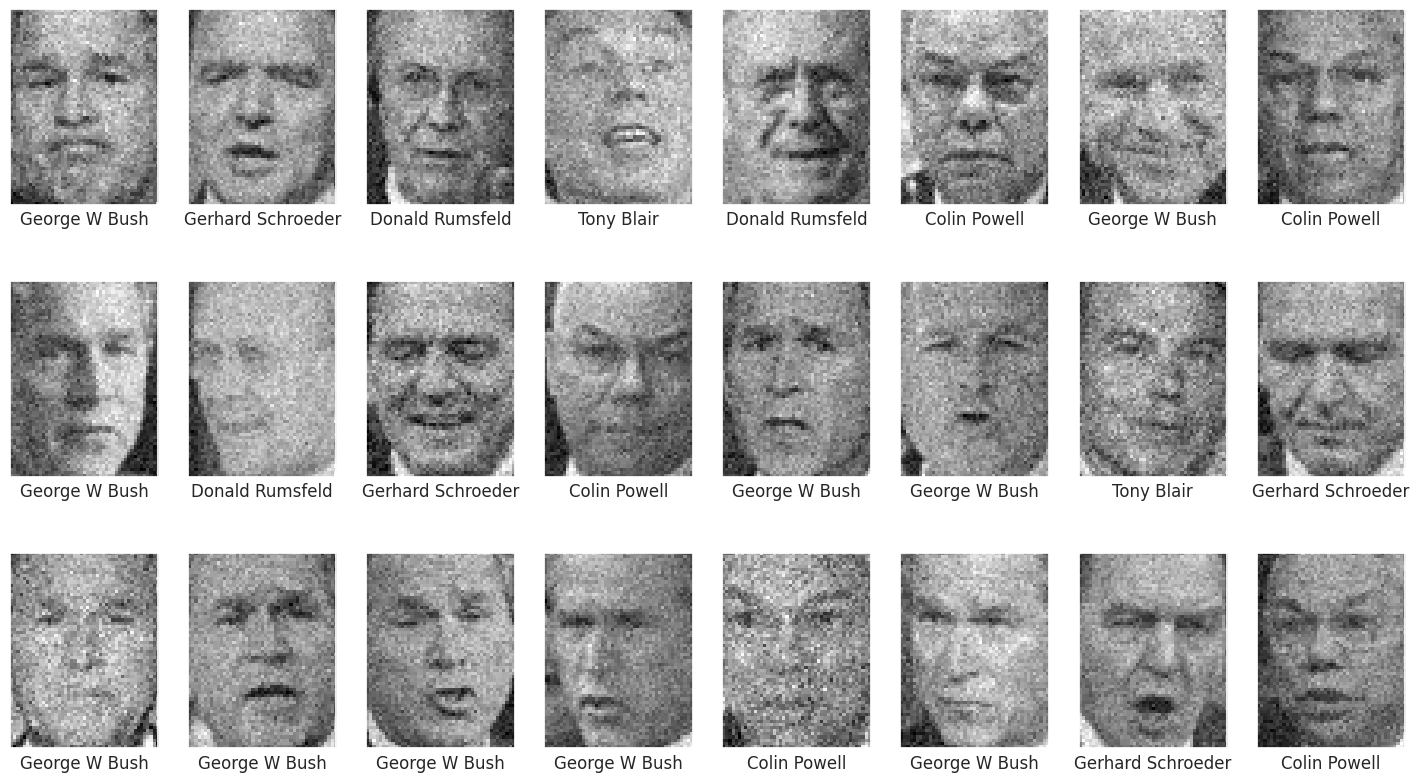

In [5]:
faces = fetch_lfw_people(min_faces_per_person=100, slice_=None)
faces.images = faces.images[:, 35:97, 39:86]
faces.data = faces.images.reshape(faces.images.shape[0], faces.images.shape[1] * faces.images.shape[2])
np.random.seed(0)
noisy_faces = np.random.normal(faces.data, 0.0765)

fig, ax = plt.subplots(3, 8, figsize=(18,10))

for i, axi in enumerate(ax.flat):
    axi.imshow(noisy_faces[i].reshape(62,47), cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [6]:
pca = PCA(0.8, random_state=0)
pca_faces = pca.fit_transform(noisy_faces)
pca.n_components_

np.int64(179)

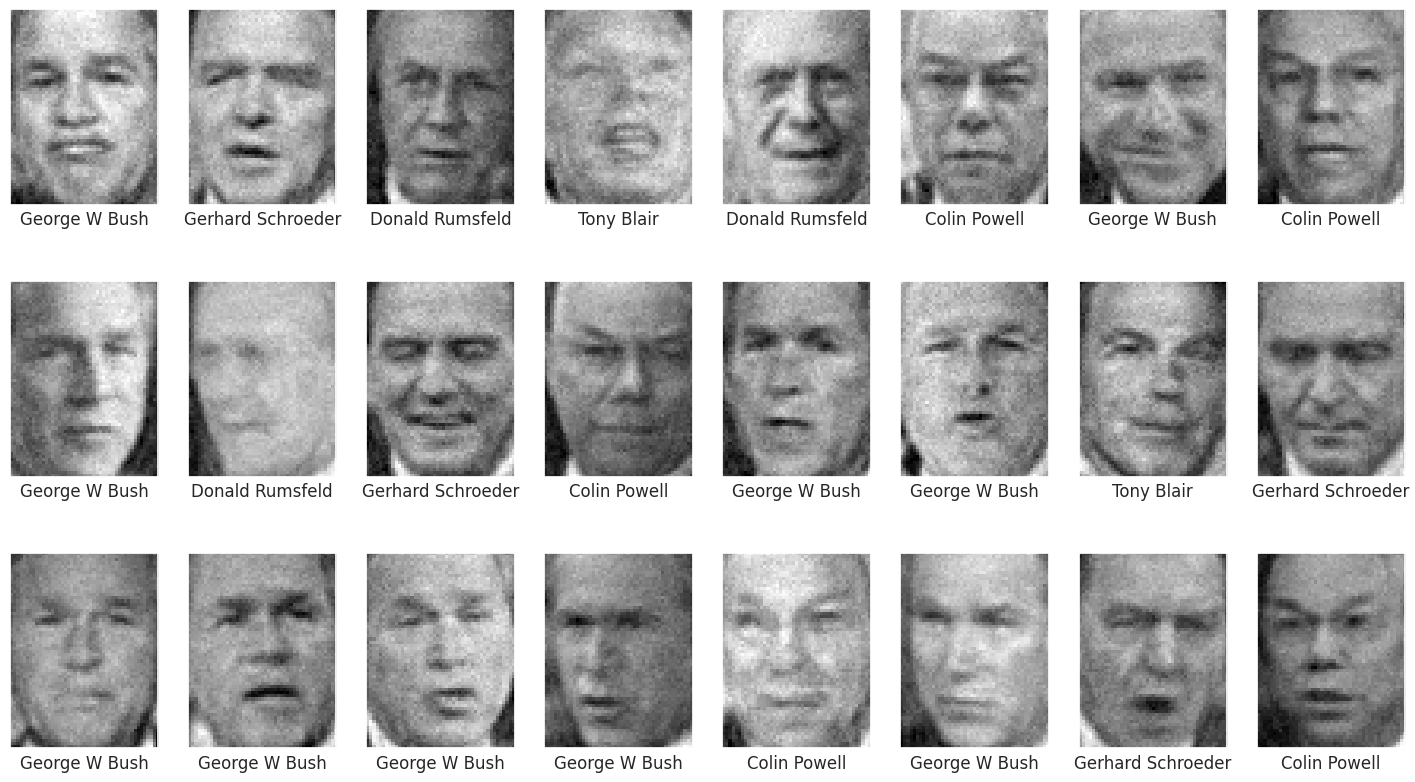

In [7]:
unpca_faces = pca.inverse_transform(pca_faces)

fig, ax = plt.subplots(3,8,figsize=(18,10))

for i, axi in enumerate(ax.flat):
    axi.imshow(unpca_faces[i].reshape(62,47), cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

## Anonymizing Data

In [8]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
pd.set_option('display.max_columns', 6)
df.head()

,mean radius,mean texture,mean perimeter,...,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,...,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,...,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,...,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,...,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,...,0.1625,0.2364,0.07678


In [9]:
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=30, random_state=0)
pca_data = pca.fit_transform(df)

scaler = StandardScaler()
anon_df = pd.DataFrame(scaler.fit_transform(pca_data))
pd.set_option('display.max_columns', 8)
anon_df.head()

,0,1,2,3,...,26,27,28,29
0,1.743043,-3.440692,1.832695,1.179529,...,-1.033900,0.767070,1.406020,0.841434
1,1.906779,0.182972,-1.335313,-2.418269,...,-0.043492,-0.798802,0.484854,-1.267746
2,1.496120,0.458381,-0.064503,-0.568556,...,0.092680,0.010964,-0.547972,0.484234
3,-0.611764,-0.788775,0.327197,1.592188,...,0.008095,0.811865,-1.511794,-1.978890
4,1.397781,2.216483,0.051866,-1.150718,...,1.716566,0.161769,1.260500,0.390467


In [10]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.9999999999999997)

## Visualizing High-Dimensional Data

Another use of PCA is to reduce a dataset to two or three diensions so that it can be plotted.

/tmp/ipykernel_153398/2009298374.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(pca_digits[:,0],pca_digits[:,1], c=digits.target, cmap=plt.cm.get_cmap('Paired',10))


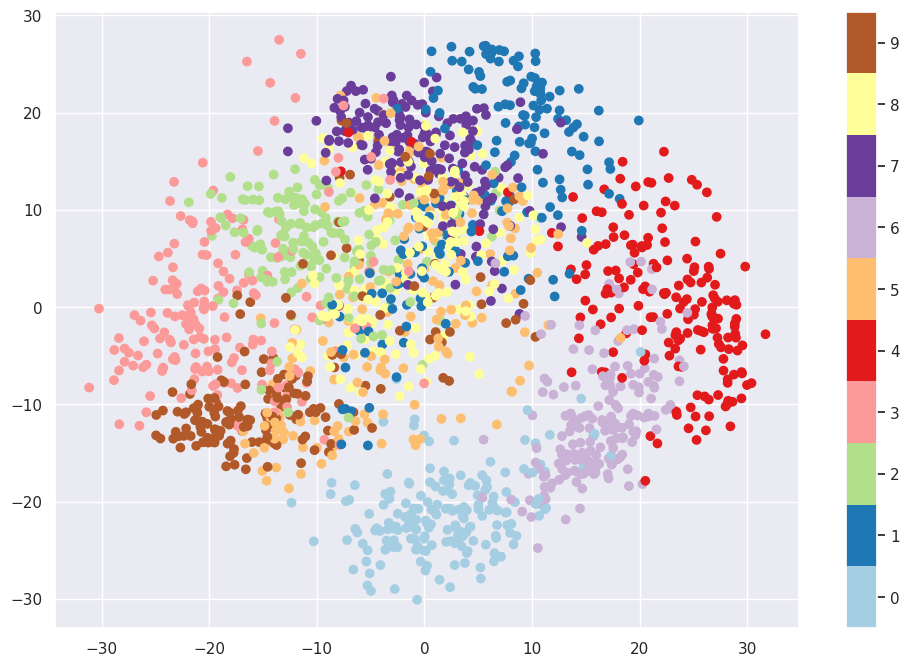

In [11]:
from sklearn.datasets import load_digits

digits = load_digits()
pca = PCA(n_components=2, random_state=0)
pca_digits = pca.fit_transform(digits.data)

plt.figure(figsize=(12,8))
plt.scatter(pca_digits[:,0],pca_digits[:,1], c=digits.target, cmap=plt.cm.get_cmap('Paired',10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5,9.5)

Another way to reduce dimensions for plotting is to use TSNE. TSNE implements t-distributed stochastic neighbor embedding or t-SNE. t-SNE is a dimensionality reduction algorithm that is used almost exclusively for visualizing high-dimensional data. t-SNE uses a nonlinear transform that tends to heighten the separation between classes by keeping similar data points close together in low-dimensional space.

/tmp/ipykernel_153398/2856693950.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(tsne_digits[:,0], tsne_digits[:,1], c=digits.target, cmap=plt.cm.get_cmap('Paired',10))


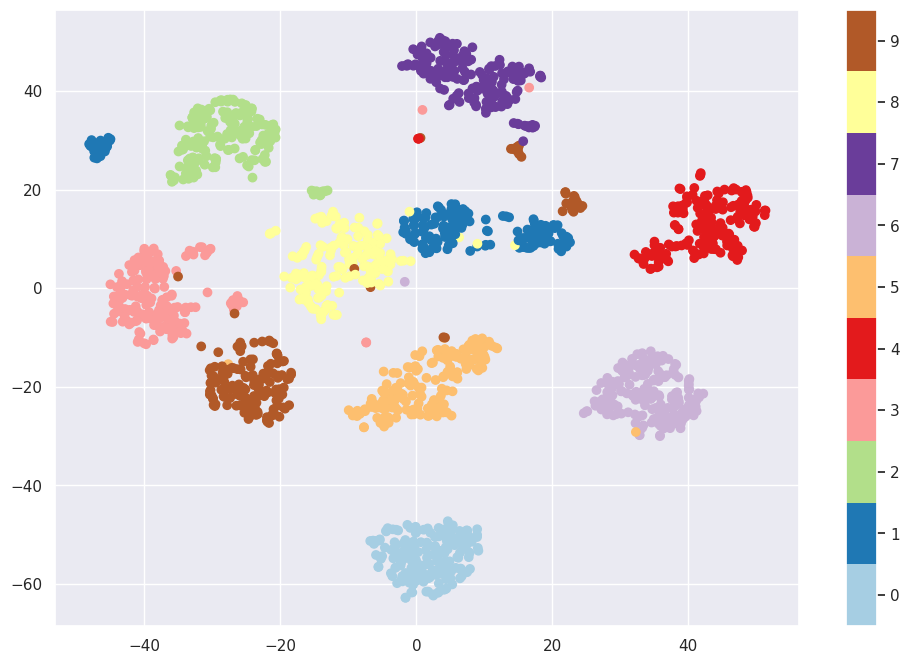

In [12]:
%matplotlib inline
from sklearn.manifold import TSNE

digits = load_digits()
tsne = TSNE(n_components=2, init='pca', learning_rate='auto', random_state=0)
tsne_digits = tsne.fit_transform(digits.data)

plt.figure(figsize=(12,8))
plt.scatter(tsne_digits[:,0], tsne_digits[:,1], c=digits.target, cmap=plt.cm.get_cmap('Paired',10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5,9.5)

## Anomaly Detection

Anomaly detection is a branch of machine learning that seeks to identify anomalies in dataset or data streams. The goal of anomaly detection is to identify outliers in data, samples that aren't "noremal" when compared to others. There are many ways to perform anomaly detection:
1. Isolation forests
2. One-class SVMs
3. Local Outlier Factor (LOF)

PCA-based anomaly detection works on the assumption that nomalous samples should exhibit more loss or reconstruction error (the difference between the original data and the same data after a PCA transform is applied and inverted) than a normal one. This means that the loss incurred when an anomalous sample is PCAed and un-PCAed should be higher than the loss incurred when the same operation is applied to a normal sample.

## Using PCA to Detect Credit Card Fraud

In [13]:
df = pd.read_csv('Data/creditcard.csv')
df.head()

legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

legit = legit.drop(['Time','Class'], axis=1)
fraud = fraud.drop(['Time','Class'], axis=1)

FileNotFoundError: [Errno 2] No such file or directory: 'Data/creditcard.csv'

In [ ]:
pca = PCA(n_components=26, random_state=0)
legit_pca = pd.DataFrame(pca.fit_transform(legit), index=legit.index)
fraud_pca = pd.DataFrame(pca.transform(fraud), index=fraud.index)
legit_restored = pd.DataFrame(pca.inverse_transform(legit_pca), index=legit_pca.index)
fraud_restored = pd.DataFrame(pca.inverse_transform(fraud_pca), index=fraud_pca.index)

In [ ]:
def get_anomaly_scores(df_original, df_restored):
    loss = np.sum((np.array(df_original) - np.array(df_restored)) ** 2, axis=1)
    loss = pd.Series(data=loss, index=df_original.index)
    return loss

legit_scores = get_anomaly_scores(legit, legit_restored)
fraud_scores = get_anomaly_scores(fraud, fraud_restored)

In [ ]:
legit_scores.plot(figsize=(12,6))

In [ ]:
fraud_scores.plot(figsize=(12,6))

In [ ]:
threshold = 200

true_neg = legit_scores[legit_scores < threshold].count()
false_pos = legit_scores[legit_scores >= threshold].count()
true_pos = fraud_scores[fraud_scores >= threshold].count()
false_neg = fraud_scores[fraud_scores < threshold].count()

labels = ['Legitimate', 'Fraudulent']
mat = [[true_neg, false_pos], [false_neg, true_pos]]

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('True label')

## Using PCA to Predict Bearing Failure

In [14]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

df = pd.read_csv('Data/bearings.csv', index_col=0, parse_dates=[0])
df.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


<Axes: >

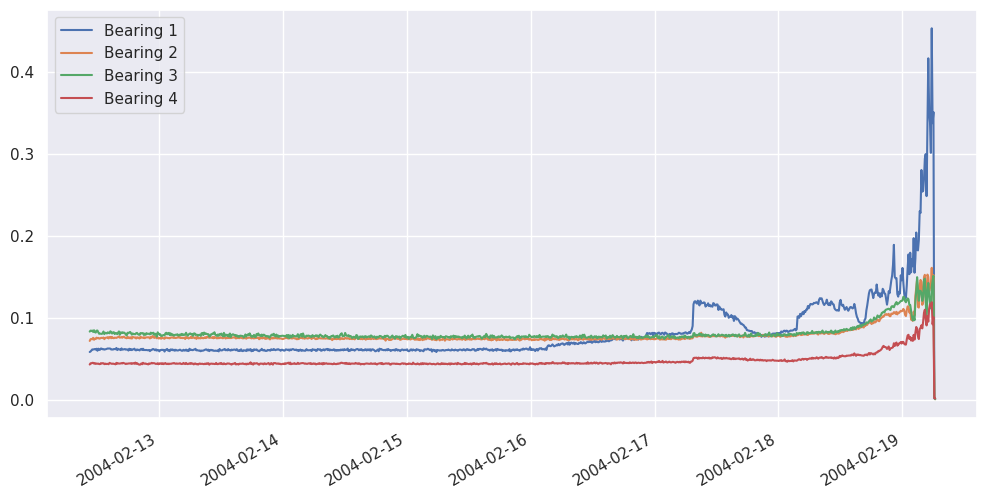

In [15]:
df.plot(figsize=(12,6))

Extract the samples representing "normal" operation and reduce the four dimensions to one using PCA, then apply the same PCA transform to the remainder of the dataset

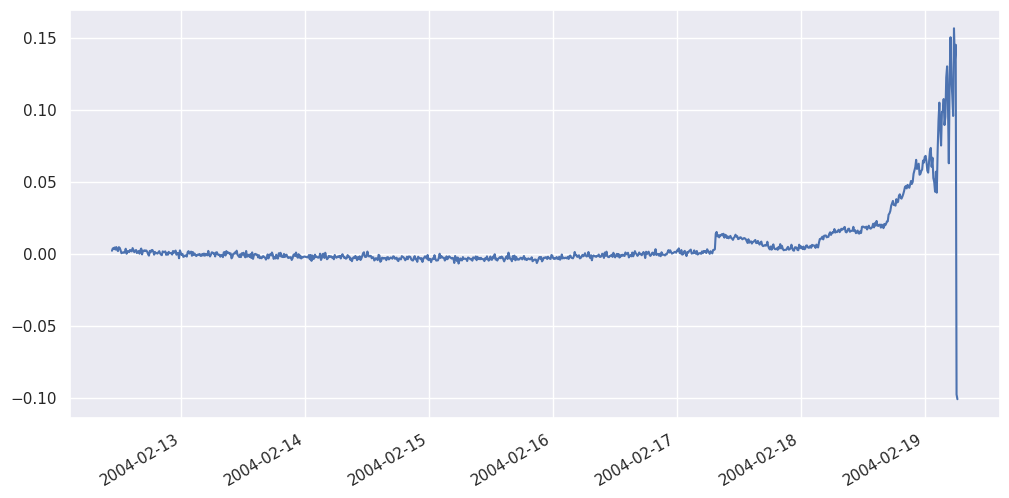

In [16]:
x_train = df['2004-02-12 10:32:39':'2004-02-13 23:42:39']
x_test = df['2004-02-13 23:52:39':]

pca = PCA(n_components=1, random_state=0)
x_train_pca = pd.DataFrame(pca.fit_transform(x_train))
x_train_pca.index = x_train.index

x_test_pca = pd.DataFrame(pca.transform(x_test))
x_test_pca.index = x_test.index

df_pca = pd.concat([x_train_pca, x_test_pca])
df_pca.plot(figsize=(12,6))
plt.legend().remove()

<Axes: >

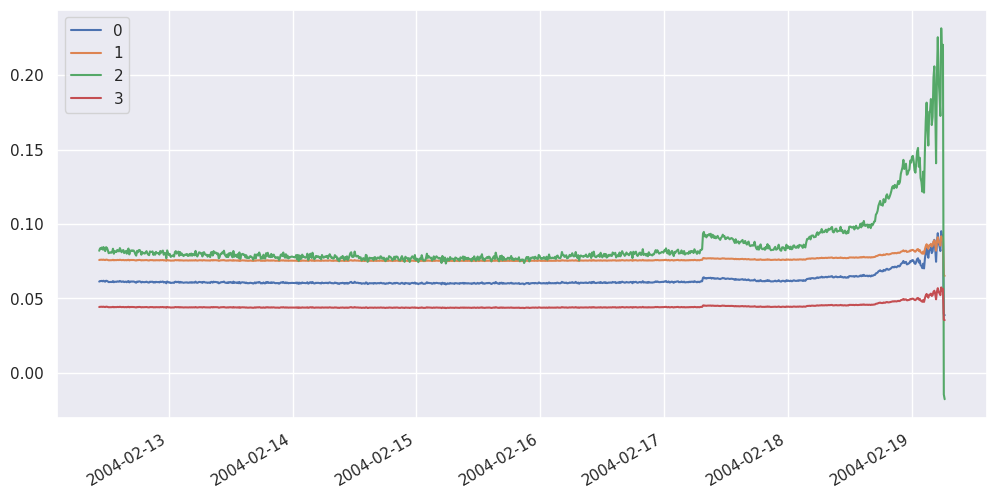

In [17]:
df_restored = pd.DataFrame(pca.inverse_transform(df_pca), index=df_pca.index)
df_restored.plot(figsize=(12,6))

<Axes: >

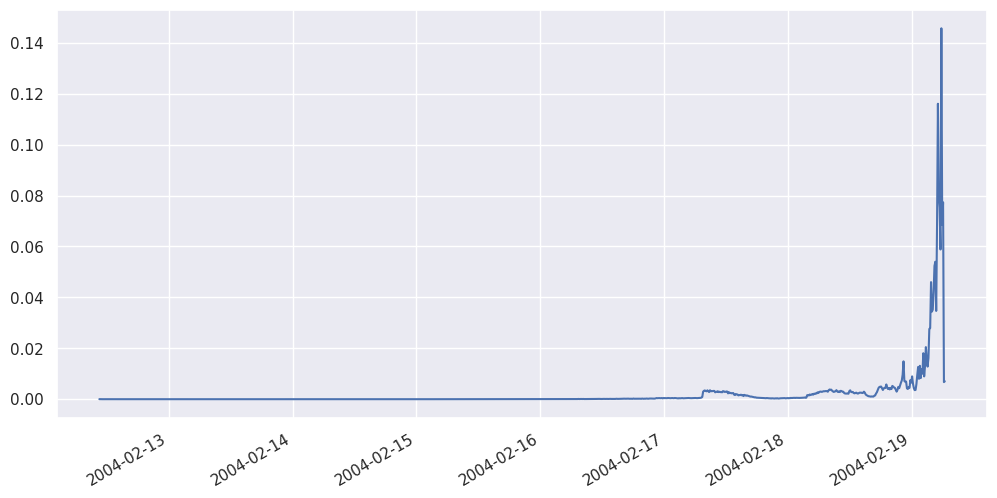

In [18]:
def get_anomaly_scores(df_original, df_restored):
    loss = np.sum((np.array(df_original) - np.array(df_restored)) ** 2, axis=1)
    loss = pd.Series(data=loss, index=df_original.index)
    return loss

scores = get_anomaly_scores(df, df_restored)
scores.plot(figsize=(12,6))

In [19]:
def is_anomaly(row, pca, threshold):
    pca_row = pca.transform(row)
    restored_row = pca.inverse_transform(pca_row)
    losses = np.sum((row-restored_row) ** 2)
    for loss in losses:
        if loss>threshold:
            return True
    return False

In [20]:
x = df.loc[['2004-02-16 22:52:39']]
is_anomaly(x, pca, 0.002)

False

In [21]:
x = df.loc[['2004-02-18 22:52:39']]
is_anomaly(x, pca, 0.002)

True

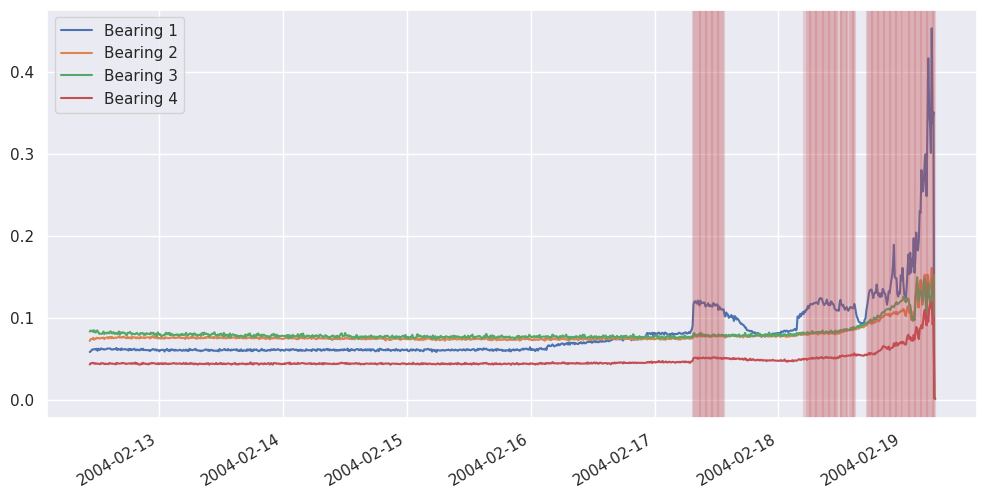

In [22]:
df.plot(figsize=(12,6))
for index, row in df.iterrows():
    if is_anomaly(pd.DataFrame([row]),pca,0.002):
        plt.axvline(row.name, color='r', alpha=0.2)

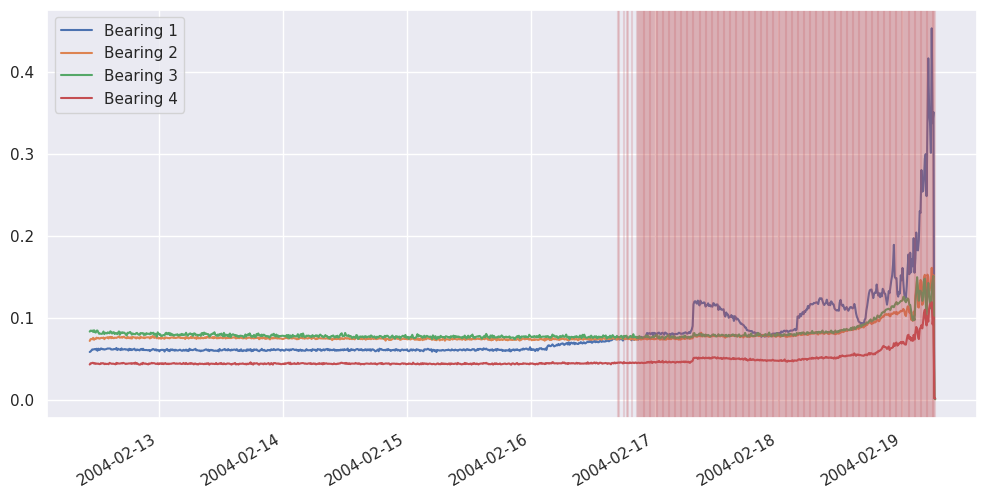

In [23]:
df.plot(figsize=(12,6))
for index, row in df.iterrows():
    if is_anomaly(pd.DataFrame([row]),pca,0.0002):
        plt.axvline(row.name, color='r', alpha=0.2)